## Questions to answer:
1. Rating per genre
2. Ratings over time per genre
3. Does price affect ratings?
4. How has price changed over time/does price change over time?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

In [2]:
# import data and assign to variable
data = pd.read_csv("Apple App Store Analysis/appstore_games.csv")
data.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

## Basic EDA

In [3]:
# view data quick stats
data.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [16]:
# distribution of app genres
# view all genre types
genre = data['Primary Genre']
genre.unique()
genre.value_counts()

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Book                     9
Social Networking        9
News                     7
Health & Fitness         5
Food & Drink             4
Navigation               3
Music                    3
Medical                  2
Travel                   1
Shopping                 1
Name: Primary Genre, dtype: int64

Text(0.5, 1.0, 'Count of App Genre')

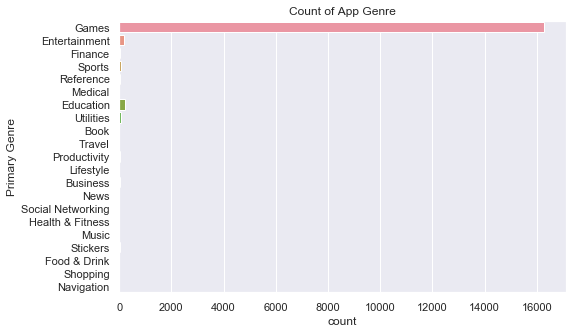

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(y=genre, orient='h')
plt.title("Count of App Genre")

In [18]:
genrePercentages = genre.value_counts(normalize=True)

Text(0.5, 1.0, 'Percentage of Genre in Store')

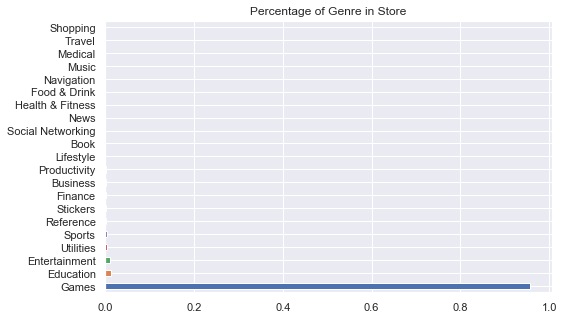

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = genrePercentages.plot(kind='barh')
plt.title("Percentage of Genre in Store")

## Average User Rating per Genre

Text(0.5, 1.0, 'Average User Rating by Genre')

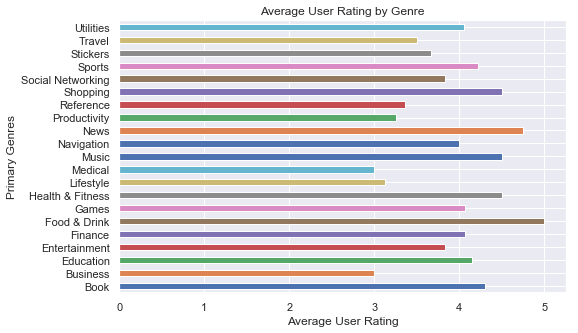

In [20]:
meanRatingsPerGenre = data.groupby('Primary Genre')['Average User Rating'].mean()
fig, ax = plt.subplots(figsize=(8, 5))
meanRatingsPerGenre.plot(kind='barh')
plt.ylabel("Primary Genres")
plt.xlabel("Average User Rating")
plt.title("Average User Rating by Genre")

## Average User Ratings over Time

In [21]:
# split release date and assign column year value
releaseYear = data['Original Release Date'].str.split('/')
releaseYear = [int(i[2]) for i in releaseYear]
data['Release Year'] = releaseYear
# releaseYear

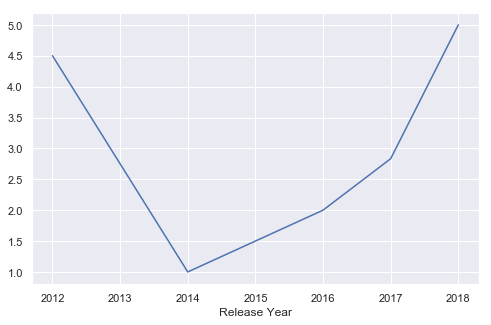

In [22]:
# filter the data down to specific genre and plot results
ratingPerYear = data[data['Primary Genre']=='Productivity'].groupby(['Release Year'])['Average User Rating'].mean()
fig, ax = plt.subplots(figsize=(8, 5))
ratingPerYear.plot(kind='line')

## Does Price Affect Ratings?

In [23]:
# focus only on apps that cost money
dataCostMoney = data[data['Price'] > 0.01]
dataCostMoney.describe()

,ID,Average User Rating,User Rating Count,Price,Size,Release Year
count,2.771000e+03,1236.000000,1236.000000,2771.000000,2.771000e+03,2771.000000
mean,9.751148e+08,4.008091,1796.065534,4.985309,1.491839e+08,2015.021292
std,3.411270e+08,0.777163,10469.391747,18.857636,3.151948e+08,2.686895
min,2.849214e+08,1.000000,5.000000,0.990000,5.980160e+05,2008.000000
25%,6.681522e+08,3.500000,15.000000,0.990000,2.286643e+07,2013.000000
50%,1.071532e+09,4.000000,67.000000,1.990000,5.673574e+07,2016.000000
75%,1.224689e+09,4.500000,414.250000,3.990000,1.526748e+08,2017.000000
max,1.474504e+09,5.000000,212763.000000,179.990000,4.005591e+09,2019.000000


C:\Users\jlhen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


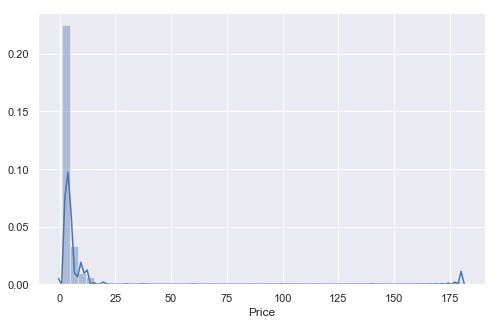

In [24]:
# is there a correlation between price and user rating?
# what is the price distribution?
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.distplot(dataCostMoney['Price'])

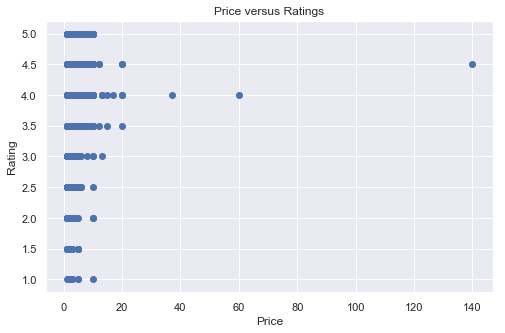

In [25]:
ratings = dataCostMoney['Average User Rating']
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(priceCostMoney, ratings)
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Price versus Ratings")
plt.show()

## How has pricing changed over the years?

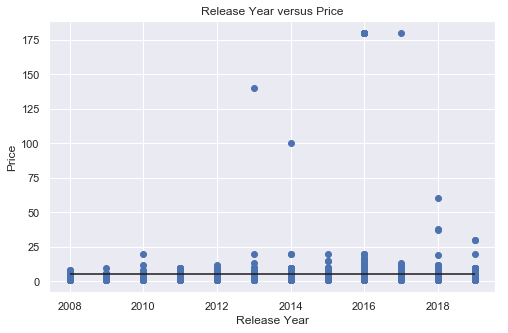

In [26]:
# plot year versus price
years = dataCostMoney['Release Year']
priceCostMoney = dataCostMoney['Price']
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(years, priceCostMoney)
plt.xlabel("Release Year")
plt.ylabel("Price")
plt.title("Release Year versus Price")
plt.hlines(priceCostMoney.mean(), years.min(), years.max())
plt.show()